# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [72]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

location =[]
Lat =[]
Lng =[]
Max_Temp =[]
Humidity =[]
Cloudiness =[]
Wind_Speed =[]
Country=[]
Date =[]

record =0
set_num =1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        location.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        print(f"Processing Record {record}| {city}")
        
        record = record +1
        
    except:
        print("City not found. Skipping...")
    
        

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 0| kapaa
Processing Record 1| katangli
Processing Record 2| constitucion
Processing Record 3| mattru
Processing Record 4| port alfred
Processing Record 5| rawson
Processing Record 6| jamestown
Processing Record 7| ushuaia
Processing Record 8| tuatapere
Processing Record 9| punta arenas
Processing Record 10| basco
Processing Record 11| new norfolk
Processing Record 12| ponta do sol
Processing Record 13| port hardy
Processing Record 14| bluff
Processing Record 15| qaanaaq
Processing Record 16| mataura
Processing Record 17| forestville
Processing Record 18| rikitea
Processing Record 19| vaini
Processing Record 20| nikolskoye
Processing Record 21| yellowknife
Processing Record 22| ust-omchug
Processing Record 23| port maria
Processing Record 24| severo-kurilsk
Processing Record 25| vardo
City not found. Skipping...
Processing Record 26| butaritari
Processing Record 27| georgetown
City not f

Processing Record 236| loyga
Processing Record 237| harper
City not found. Skipping...
Processing Record 238| asau
Processing Record 239| araouane
Processing Record 240| beringovskiy
Processing Record 241| fernley
Processing Record 242| batagay-alyta
Processing Record 243| lagoa
Processing Record 244| newport
Processing Record 245| pozo colorado
Processing Record 246| samarinda
City not found. Skipping...
Processing Record 247| waipawa
Processing Record 248| plettenberg bay
Processing Record 249| flinders
Processing Record 250| clarence town
Processing Record 251| san patricio
Processing Record 252| aklavik
Processing Record 253| kruisfontein
Processing Record 254| caska
Processing Record 255| hay river
Processing Record 256| yumen
Processing Record 257| avera
Processing Record 258| tupik
Processing Record 259| clyde river
Processing Record 260| inhambane
Processing Record 261| sisimiut
Processing Record 262| gweta
Processing Record 263| geraldton
Processing Record 264| hofn
Processing

Processing Record 470| sokoni
Processing Record 471| bay roberts
Processing Record 472| jinchang
Processing Record 473| santa maria
Processing Record 474| pindiga
Processing Record 475| birao
Processing Record 476| keuruu
Processing Record 477| otacilio costa
Processing Record 478| boundiali
Processing Record 479| leshukonskoye
Processing Record 480| ferkessedougou
Processing Record 481| hasaki
Processing Record 482| livny
Processing Record 483| marsa matruh
City not found. Skipping...
Processing Record 484| salta
Processing Record 485| lasa
Processing Record 486| kifri
Processing Record 487| moose factory
Processing Record 488| boyolangu
City not found. Skipping...
Processing Record 489| blenheim
Processing Record 490| mahina
Processing Record 491| washougal
Processing Record 492| malpe
Processing Record 493| saint-joseph
Processing Record 494| sabang
Processing Record 495| qasigiannguit
Processing Record 496| jumla
Processing Record 497| katima mulilo
City not found. Skipping...
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
Weather_df = {
    "City": location,
    "Lat": Lat,
    "Lng":  Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind_Speed": Wind_Speed,
    "Country":Country,
    "Date":Date
}
Weather = pd.DataFrame(Weather_df)
Weather.count()


City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind_Speed    545
Country       545
Date          545
dtype: int64

In [75]:
Weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Kapaa,22.08,-159.32,82.00,69,90,16.11,US,1595300957
1,Katangli,51.71,143.23,55.99,88,100,16.44,RU,1595300957
2,Constitución,-35.33,-72.42,52.14,87,99,12.73,CL,1595300957
3,Mattru,7.62,-11.83,72.72,98,100,4.21,SL,1595300957
4,Port Alfred,-33.59,26.89,57.67,68,0,3.60,ZA,1595300957


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
#the max humidity is 100
Weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,20.531505,22.087761,69.019156,69.177982,51.600000,7.581541,1.595301e+09
std,33.676368,89.499681,13.255481,21.854622,40.606586,5.158189,7.473696e+01
min,-54.800000,-175.200000,17.600000,1.000000,0.000000,0.270000,1.595301e+09
25%,-7.570000,-54.130000,59.000000,56.000000,3.000000,3.440000,1.595301e+09
50%,27.180000,26.890000,69.800000,75.000000,59.000000,6.640000,1.595301e+09
75%,49.080000,99.890000,78.800000,86.000000,93.000000,10.290000,1.595301e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,28.030000,1.595301e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [101]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
Weather.to_csv("weather.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

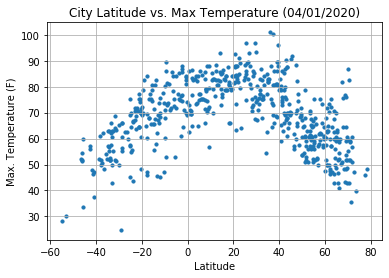

<Figure size 432x288 with 0 Axes>

In [65]:
plt.scatter(Weather["Lat"], Weather["Max Temp"], marker="o", s=10)


plt.title("City Latitude vs. Max Temperature (04/01/2020)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Plots/Lat_v_Temp.png")

## Latitude vs. Humidity Plot

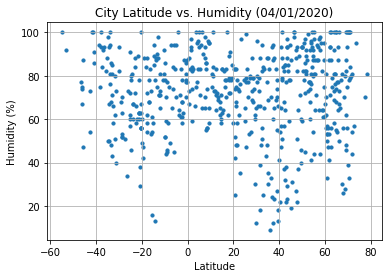

<Figure size 432x288 with 0 Axes>

In [66]:
plt.scatter(Weather["Lat"], Weather["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity (04/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Plots/Lat_v_Humidity.png")

## Latitude vs. Cloudiness Plot

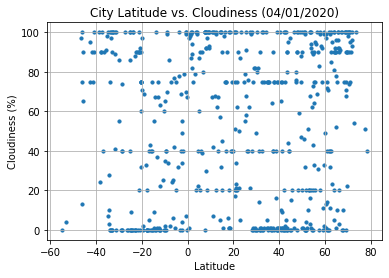

<Figure size 432x288 with 0 Axes>

In [67]:
plt.scatter(Weather["Lat"], Weather["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness (04/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Plots/Lat_v_Cloudiness.png")

## Latitude vs. Wind Speed Plot

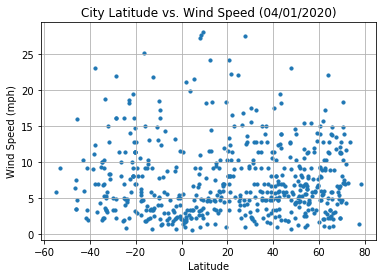

<Figure size 432x288 with 0 Axes>

In [69]:
plt.scatter(Weather["Lat"], Weather["Wind_Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed (04/01/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Plots/Lat_v_Wind_Speed.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


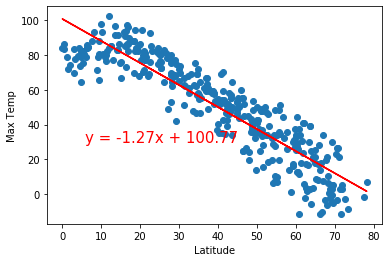

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


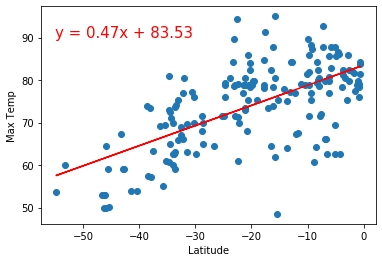

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


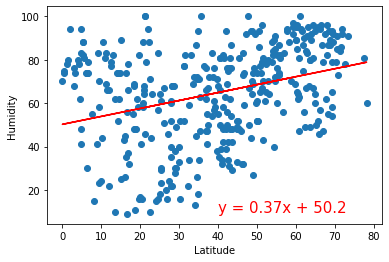

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


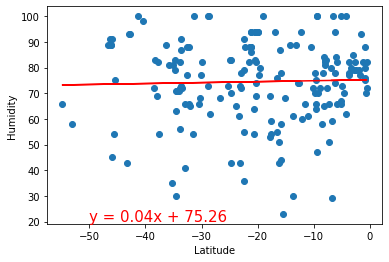

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


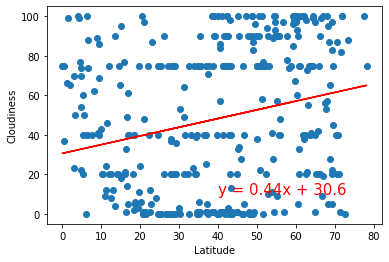

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


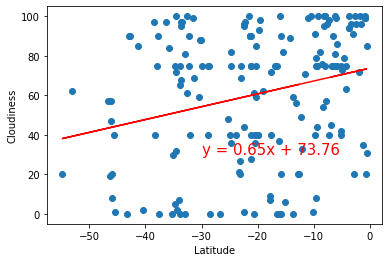

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


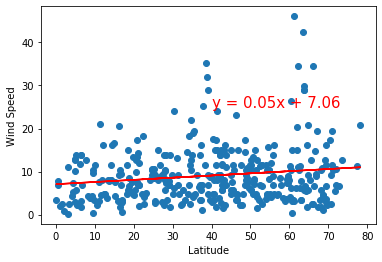

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


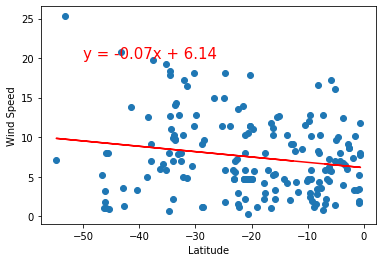